In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
import sqlite3
import networkx as nx
import datetime as datetime
import json
from scipy import stats
from operator import itemgetter

In [2]:
con = sqlite3.connect(r'\Users\Usuario\OneDrive\Documentos\Arquivos Henrique\Data Science\Python\hilary clinton  emails\database.sqlite')

In [3]:
cur = con.cursor()

In [4]:
cur.execute('''
WITH ExtractedFrom AS (SELECT CASE WHEN e2.ExtractedFrom LIKE 'H' THEN 'Clinton, Hillary'
     WHEN e2.ExtractedFrom LIKE '%abedin%' THEN 'Abedin, Huma <abedinh@state.gov>'
     WHEN e2.ExtractedFrom LIKE '%mills%' THEN 'Mills, Cheryl <millscd@state.gov>'
     WHEN e2.ExtractedFrom LIKE '%sullivan%' THEN 'Sullivan, Jacob <SullivanJJ@state.gov>'
     WHEN e2.ExtractedFrom LIKE '%valmoro%' THEN 'Valmoro, Lona <ValmoroU@state.gov>'
     ELSE e2.ExtractedFrom 
     END AS ExtractedFrom
     FROM Emails e2) 
SELECT a.Alias, e.MetadataSubject, 
STRFTIME('%Y', e.MetadataDateSent) year_sent, STRFTIME('%Y-%m', e.MetadataDateSent) year_month_sent, 
e.MetadataDocumentClass, e.ExtractedSubject, e.ExtractedTo, e.ExtractedCc, e.ExtractedBodyText, e.ExtractedReleaseInPartOrFull,
CASE WHEN e.MetadataTo  LIKE 'H' THEN 'Hillary Clinton'
     WHEN e.MetadataTo  LIKE 'H2' THEN 'Hillary Clinton'
     WHEN e.MetadataTo  LIKE ';H' THEN 'Hillary Clinton'
     WHEN e.MetadataTo  LIKE '%hillary%' THEN 'Hillary Clinton'     
     WHEN e.MetadataTo LIKE '%hanley%' THEN 'Monica Hanley'
     WHEN e.MetadataTo LIKE '%Russo%' THEN 'Robert Russo'
     WHEN e.MetadataTo LIKE '%sullivan%' THEN 'Jacob J Sullivan'
     WHEN e.MetadataTo LIKE '%sulllivan%' THEN 'Jacob J Sullivan'
     WHEN e.MetadataTo LIKE '%mills%' THEN 'Cheryl Mills'
     WHEN e.MetadataTo LIKE '%abedin%' THEN 'Huma Abedin'
     WHEN e.MetadataTo LIKE '%jiloty%' THEN 'Lauren Jiloty'
     WHEN e.MetadataTo LIKE '%valmoro%' THEN 'Lona Valmoro'
     WHEN e.MetadataTo LIKE '%cheryl%' THEN 'Cheryl Mills'
     WHEN e.MetadataTo LIKE '%berger%' THEN 'Samuel Berger'
     WHEN e.MetadataTo LIKE '%crowley%' THEN 'Phillip J Crowley'
     WHEN e.MetadataTo LIKE '%slaughter%' THEN 'Anne-Marie Slaughter'
     WHEN e.MetadataTo LIKE '%verma%' THEN 'Richard R Verma'
     WHEN e.MetadataTo LIKE '%oscar%' THEN 'Oscar Flores'
     WHEN e.MetadataTo LIKE '%muscatine%' THEN 'Lissa Muscatine'
     WHEN e.MetadataTo LIKE '%balderston%' THEN 'Kris Balderston'
     ELSE e.MetadataTo 
     END AS MetadataTo,
REPLACE(REPLACE(ExtractedFrom, '<', ''), '>', '') AS ExtractedFrom,
CASE WHEN name LIKE '%valmoro%' THEN 'Lona Valmoro'
     WHEN name LIKE '%vanbuskirk%' THEN 'Michael Vanbuskirk'
     WHEN name LIKE '%abedin%' THEN 'Huma Abedin'
     WHEN name LIKE '%gordon%' THEN 'Philip Gordon'
     WHEN name LIKE '%loty%' THEN 'Lauren Jiloty'
     WHEN name LIKE '%balderston%' THEN 'Kris Balderston'
     WHEN name LIKE '%kellyC%' THEN 'Craig Kelly'
     WHEN name LIKE '%sullivan%' THEN 'Jacob J Sullivan'
     WHEN name LIKE '%rooneym%' THEN 'Megan Rooney'
     WHEN name LIKE '%("sandy")%' THEN 'Samuel Berger'
     ELSE name
     END AS name
FROM Aliases a 
JOIN Persons p 
ON p.Id = a.PersonId 
JOIN Emails e 
ON e.SenderPersonId = p.Id 
JOIN EmailReceivers er 
ON er.EmailId = e.Id 
GROUP BY er.EmailId ''')

In [5]:
columns = [i[0] for i in cur.description]
columns

['Alias',
 'MetadataSubject',
 'year_sent',
 'year_month_sent',
 'MetadataDocumentClass',
 'ExtractedSubject',
 'ExtractedTo',
 'ExtractedCc',
 'ExtractedBodyText',
 'ExtractedReleaseInPartOrFull',
 'MetadataTo',
 'ExtractedFrom',
 'name']

In [6]:
table = pd.DataFrame(cur.fetchall(), columns = columns)

In [7]:
table.head()

,Alias,MetadataSubject,year_sent,year_month_sent,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedCc,ExtractedBodyText,ExtractedReleaseInPartOrFull,MetadataTo,ExtractedFrom,name
0,sullivan jj@state.gov,WOW,2012,2012-09,HRC_Email_296,FW: Wow,,,,RELEASE IN FULL,Hillary Clinton,"Sullivan, Jacob J Sullivan11@state.gov",Jacob J Sullivan
1,c:mills cheryl,CHRIS STEVENS,2012,2012-09,HRC_Email_296,Re: Chris Stevens,B6,"Abedin, Huma",Thx,RELEASE IN PART,Hillary Clinton,"Mills, Cheryl D MillsCD@state.gov",Cheryl Mills
2,c:mills cheryl,CAIRO CONDEMNATION - FINAL,2012,2012-09,HRC_Email_296,FVV: Cairo Condemnation - Final,,"Mitchell, Andrew B",,RELEASE IN PART,Hillary Clinton,"Mills, Cheryl D MillsCD@state.gov",Cheryl Mills
3,hillary clinton,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,2011,2011-03,HRC_Email_296,,,,"H <hrod17@clintonemail.com>\nFriday, March 11,...",RELEASE IN PART,Huma Abedin,,Hillary Clinton
4,hillary clinton,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,2012,2012-09,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,,,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,RELEASE IN PART,Robert Russo,,Hillary Clinton


In [8]:
table['Alias'].value_counts()

hillary clinton          1949
abedin huma              1435
c:mills cheryl           1298
sullivan jj@state.gov     871
blumenthal sidney         363
                         ... 
hormats robert d            1
posner michael h            1
recos                       1
butzgy christopher h        1
d.gunners2010               1
Name: Alias, Length: 125, dtype: int64

In [9]:
def get_interactions(row):
    interactions = set()
    
    interactions.add((row["MetadataTo"], row["name"]))
    
    interactions.discard((None, None))
    return interactions

In [10]:
dados = table.where((pd.notnull(table)), None)

In [11]:
graph = nx.Graph()

In [12]:
for index, cols in dados.iterrows():
    interactions = get_interactions(cols)
    graph.add_nodes_from(interactions)
    graph.add_edges_from(interactions)

In [13]:
print(f"Há {graph.number_of_nodes()} nodes e {graph.number_of_edges()} edges nesse grafo")

Há 644 nodes e 338 edges nesse grafo


In [14]:
largest_subgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=(len))
graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(largest_subgraph,  normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [15]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")

the node with id Hillary Clinton has a degree centrality of 0.79 which is the maximum of the Graph
the node with id Hillary Clinton has a closeness centrality of 0.81 which is the maximum of the Graph
the node with id Hillary Clinton has a betweenness centrality of 0.93 which is the maximum of the Graph


In [16]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange']
central_nodes = ['Hillary Clinton']

In [17]:
d = dict(node_and_degree)
largest_nodes = [g for g in largest_subgraph.nodes() if node_and_degree[g] > 3]
label = {}
for node in largest_subgraph.nodes():
    if node in largest_nodes:
        label[node] = node

In [18]:
for n in d:
    if n == 'Hillary Clinton':
        size_center_node = d[n]

In [19]:
pos = nx.spring_layout(largest_subgraph, k=0.05)

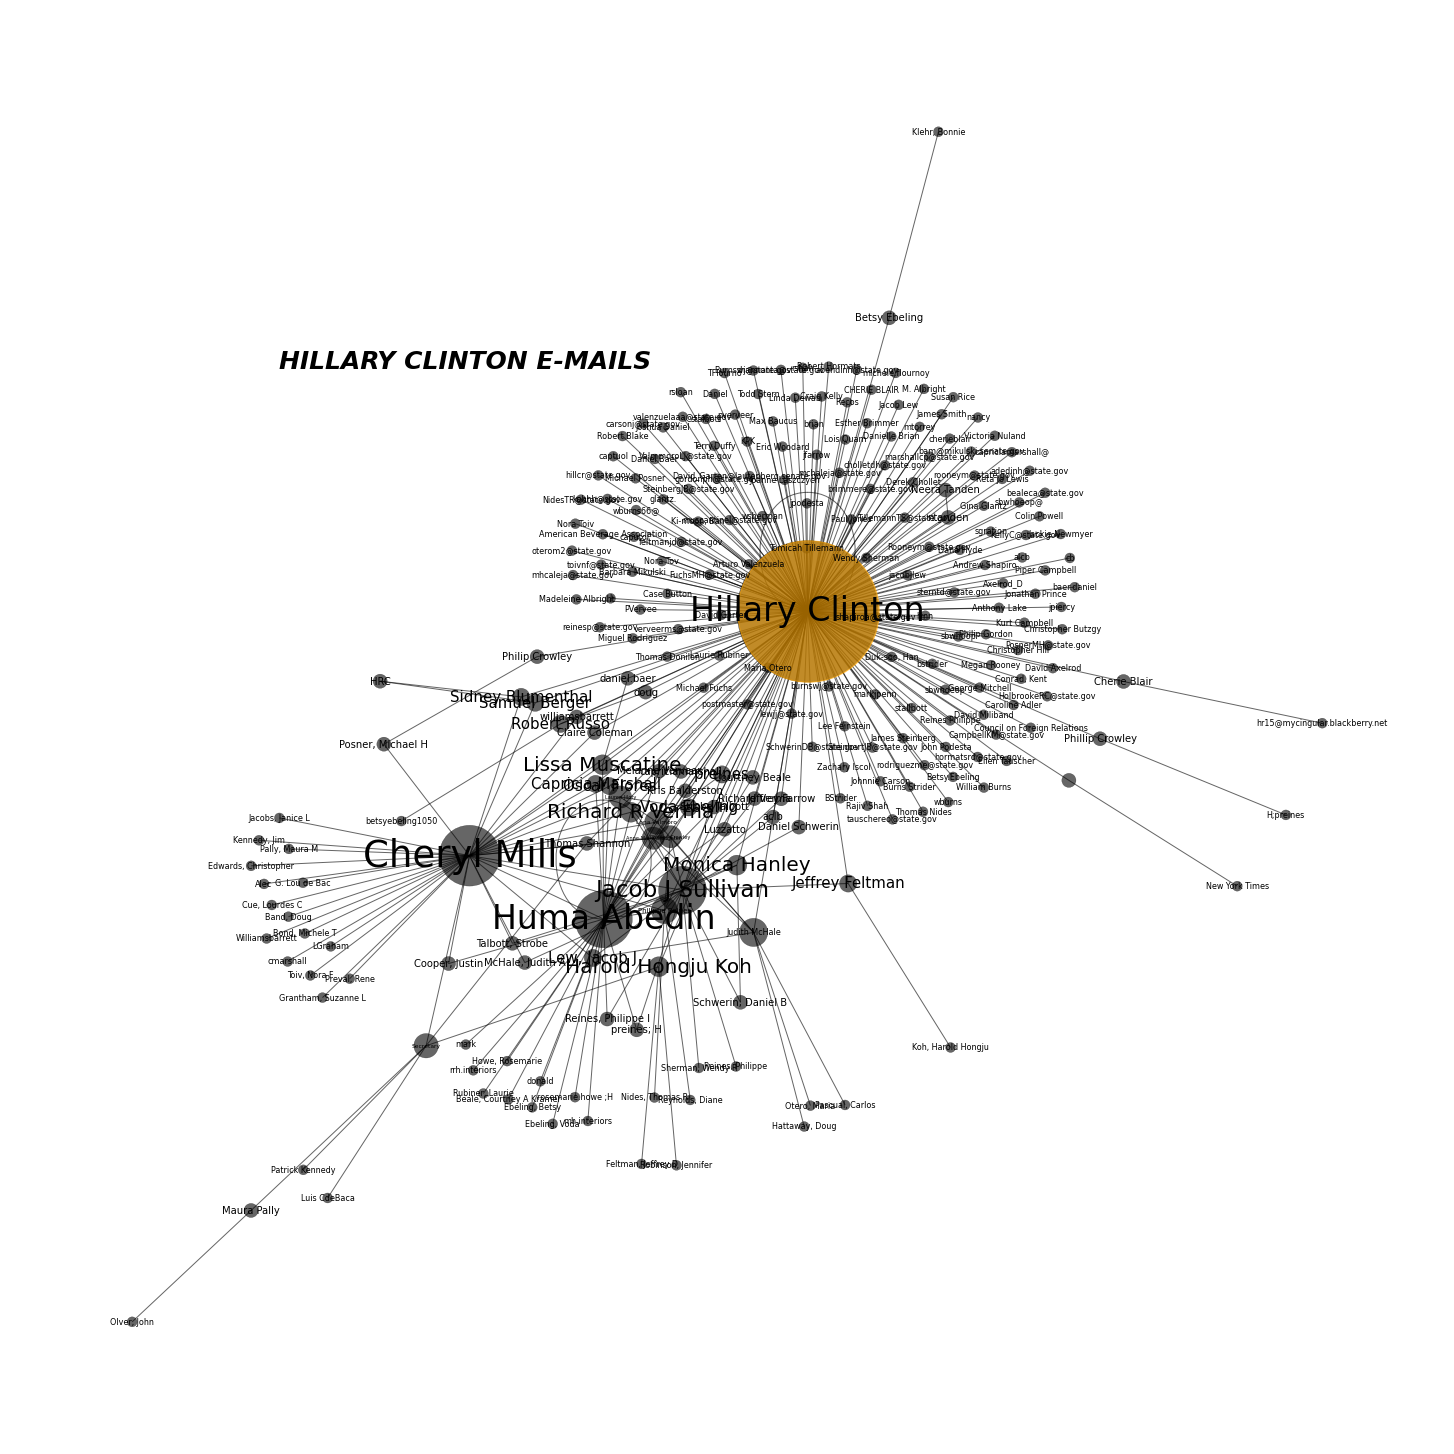

In [20]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color='black', edge_color='black', linewidths=0.3,
        node_size=[v * 100 for v in d.values()], alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, 
                       node_size=100*size_center_node, alpha=0.6, node_color=colors_central_nodes)
for node, (x, y) in pos.items():
    teste = d[node]
    if teste > 100:
        teste = teste/6
    elif teste < 5 and teste > 1:
        teste = teste*5
    elif teste == 1:
        teste = teste*8
    else:
        teste = teste
    text(x, y, node, fontsize=teste, ha='center', va='center')
#nx.draw_networkx_labels(largest_subgraph, pos=pos, labels=label, font_size=15, font_color='black')
#plt.savefig('graphfinal.png')
plt.text(-0.7,0.5,"HILLARY CLINTON E-MAILS", style='oblique', fontweight='bold', size=25)
plt.show()